In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-26,31.680000,32.000000,26.930000,27.59,27.59,0.0
2022-02-27,31.680000,32.000000,26.930000,27.59,27.59,0.0
2022-02-28,32.439999,33.509998,28.430000,30.15,30.15,0.0
2022-03-01,29.450001,35.189999,29.440001,33.32,33.32,0.0
2022-03-02,34.200001,34.410000,30.120001,30.74,30.74,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-26,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3.941780e+09
2022-02-27,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3.941780e+09
2022-02-28,4354.169922,4388.839844,4315.120117,4373.939941,4373.939941,4.594010e+09
2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4.679400e+09
2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,2.867998e+09


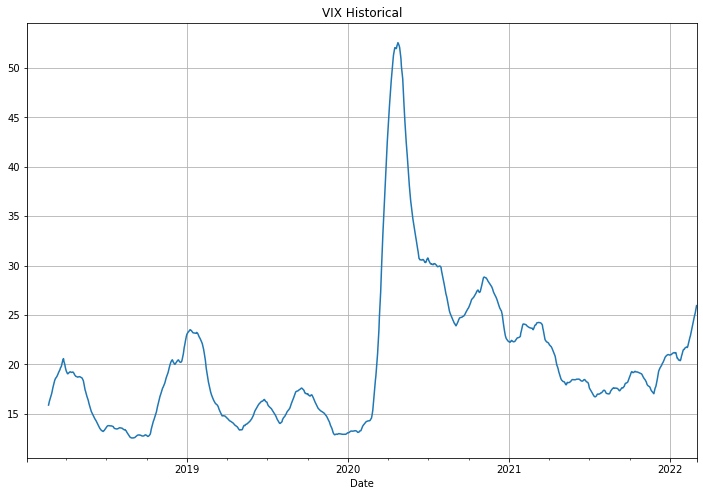

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

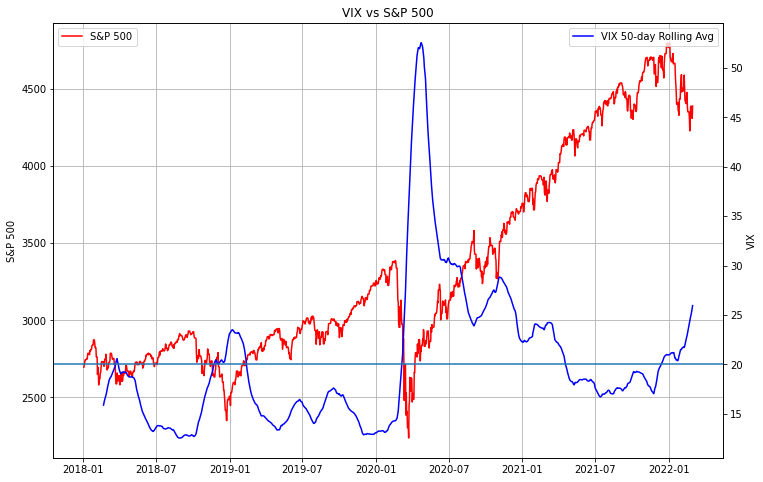

In [5]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)